# Hierarchical Clustering Q2

In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# importing the dataset
o_data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Hierarichal Clustering\\Assignment\\crime_data.csv')

In [3]:
data = o_data.copy()

In [4]:
# checking the features in the dataset
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# Dimensions of the dataset
data.shape

(50, 5)

In [6]:
# Checking for null values
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

There are no null values

In [7]:
# Checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values

In [8]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
# Creating Feature Dictionary
feature_dict = pd.DataFrame(columns=['Name of Feature','Description','Type','Relevance'])

feature_dict ['Name of Feature'] = data.columns

feature_dict ['Description'] = ['USA States','Murder arrests in the state',
'Assault arrests in the state','% Urban Population','Rape arrests in the state']

feature_dict['Type'] = ['Nominal','Ratio','Ratio','Ratio','Ratio']

feature_dict['Relevance'] = ['Irrelevant','Relevant','Relevant','Relevant','Relevant']

feature_dict

,Name of Feature,Description,Type,Relevance
0,Unnamed: 0,USA States,Nominal,Irrelevant
1,Murder,Murder arrests in the state,Ratio,Relevant
2,Assault,Assault arrests in the state,Ratio,Relevant
3,UrbanPop,% Urban Population,Ratio,Relevant
4,Rape,Rape arrests in the state,Ratio,Relevant


In [10]:
# Dropping Irrelevant and output feature
data.drop(['Unnamed: 0'],axis = 1, inplace = True )

In [11]:
# Statistical Description
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

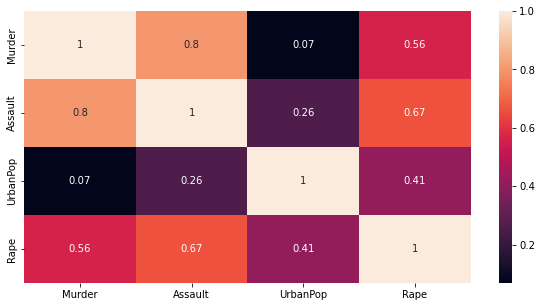

In [12]:
# Heat map to check for correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

Assault, Murder and Rape are correlated to each other.

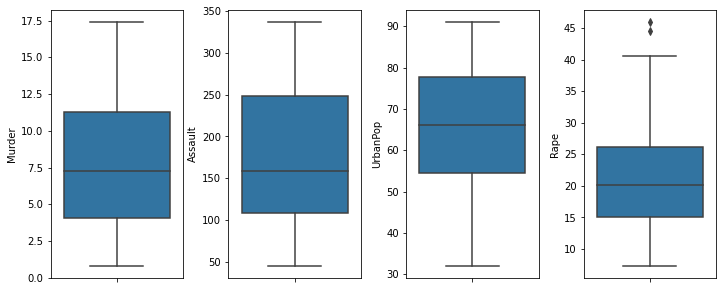

In [13]:
# Checking for outliers using boxplot

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(10, 4))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,0:]
for k,v in data1.items():
    sns.boxplot(y = k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

There are some outliers present in the Rape feature

In [14]:
# Winsorizing the outliers to retain the data from the outliers

IQR = data['Rape'].quantile(0.75) - data['Rape'].quantile(0.25)
upper_end = data['Rape'].quantile(0.75) + (1.5*IQR)
low_end = data['Rape'].quantile(0.25) - (1.5*IQR)
if low_end < 0:
    low_end = 0
    data['Rape'] = pd.DataFrame(np.where(data['Rape'] > upper_end,upper_end, 
                      np.where(data['Rape'] < low_end,low_end,data['Rape'])))
else:
    data['Rape'] = pd.DataFrame(np.where(data['Rape'] > upper_end,upper_end, 
                      np.where(data['Rape'] < low_end,low_end,data['Rape'])))        

In [15]:
data.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825


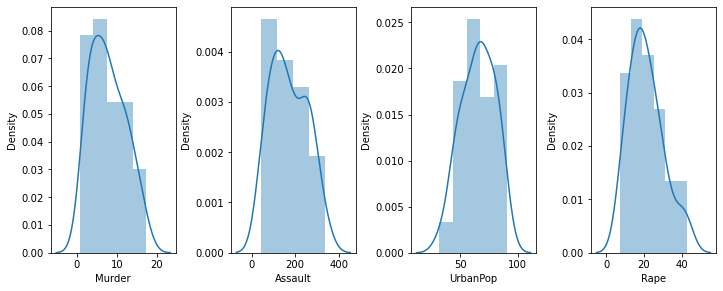

In [16]:
# # Distplot

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(10, 4))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,:]
for k,v in data1.items():
    sns.distplot(data[k], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

The features are normally distributed

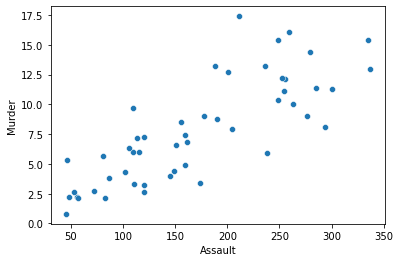

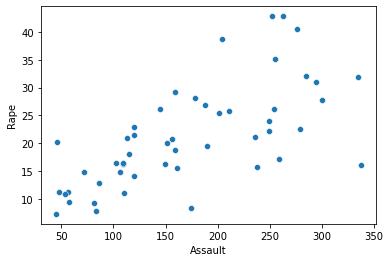

In [17]:
# Scatterplot of the features

sns.scatterplot(x = data.Assault , y = data.Murder);plt.show()
sns.scatterplot(x = data.Assault , y = data.Rape);plt.show()

    As assualt cases increase, Murder and Rape cases increased.

In [18]:
# Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = pd.DataFrame(sc.fit_transform(data),columns = data.columns)

In [19]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
norm_data = pd.DataFrame(mm.fit_transform(data),columns = data.columns)

# Hierarchical Clustering 

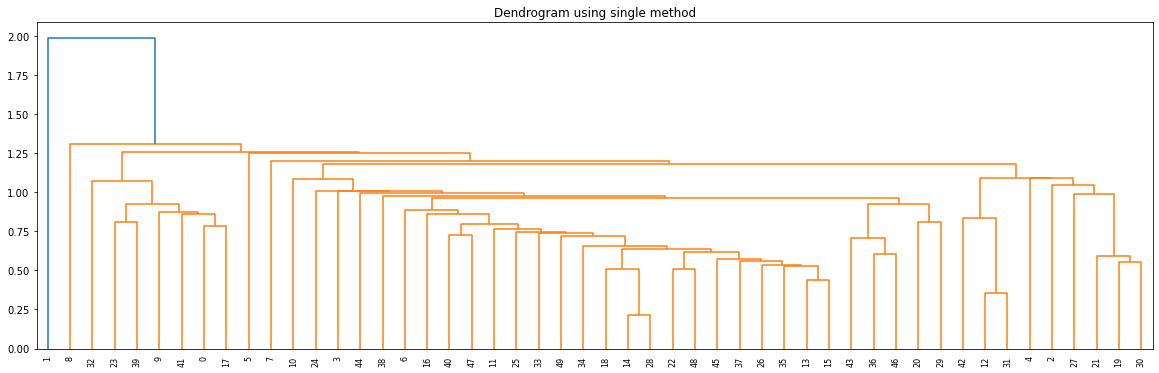

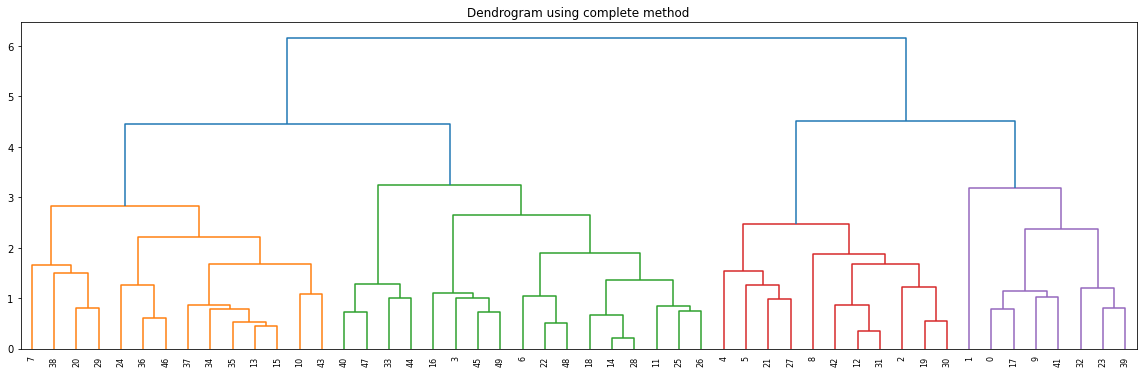

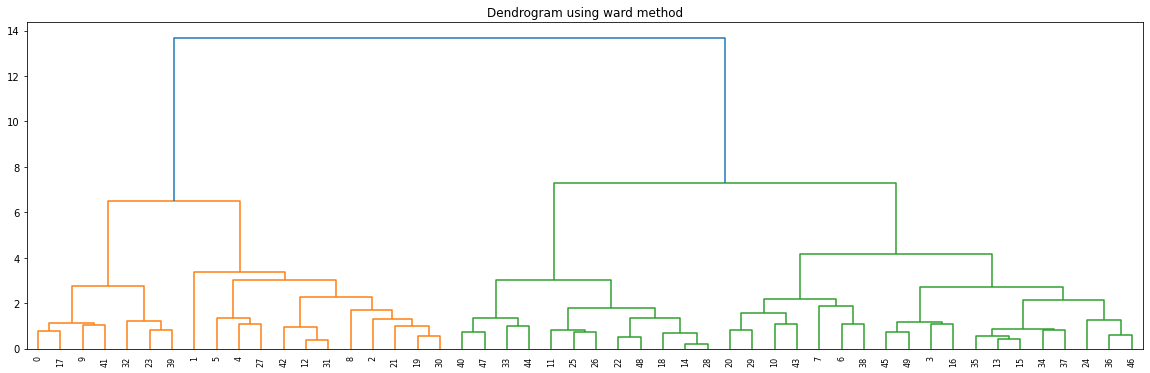

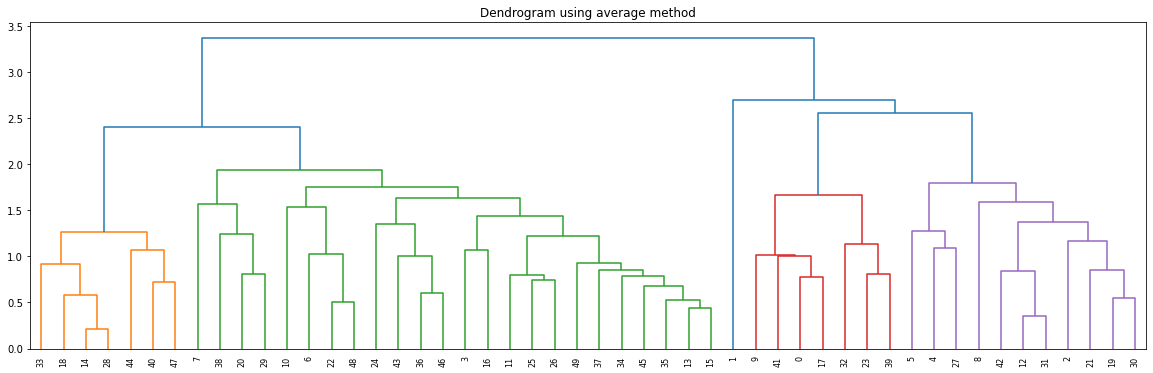

In [20]:
# Checking Dendogram for the dataset

import scipy.cluster.hierarchy as sch
for meth in ['single','complete','ward','average']:
    plt.figure(figsize =(20, 6))
    dendo = sch.dendrogram(sch.linkage(std_data,method = meth))
    plt.title('Dendrogram using {} method'.format(meth))

In [21]:
# Agglomerative Clustering to check for number of clusters on standardised dataset

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for cluster in range(2,7):
    print('\n')
    for link in ['single','complete','ward','average']:
        Agg_cluster = AgglomerativeClustering(n_clusters = cluster,linkage = link, affinity='euclidean')
        cluster_labels = Agg_cluster.fit_predict(std_data)
        s_score = silhouette_score(std_data,cluster_labels)
        print('For {} clusters ({}) silhouette score is {}.'.format(cluster,link,s_score))



For 2 clusters (single) silhouette score is 0.21580265264134207.
For 2 clusters (complete) silhouette score is 0.4051025513040865.
For 2 clusters (ward) silhouette score is 0.4051025513040865.
For 2 clusters (average) silhouette score is 0.4051025513040865.


For 3 clusters (single) silhouette score is 0.1367289912047978.
For 3 clusters (complete) silhouette score is 0.36936052314963363.
For 3 clusters (ward) silhouette score is 0.31234246125428167.
For 3 clusters (average) silhouette score is 0.34090164890835245.


For 4 clusters (single) silhouette score is 0.16763155316174816.
For 4 clusters (complete) silhouette score is 0.29700964737572655.
For 4 clusters (ward) silhouette score is 0.33799212819290597.
For 4 clusters (average) silhouette score is 0.36129663435474524.


For 5 clusters (single) silhouette score is 0.104203015746141.
For 5 clusters (complete) silhouette score is 0.24330905666473168.
For 5 clusters (ward) silhouette score is 0.3115319584173333.
For 5 clusters (avera

    Selecting 3 clusters based on silhouette score.

In [22]:
# Agglomerative Clustering to check for number of clusters on normalized dataset

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for cluster in range(2,7):
    print('\n')
    for link in ['single','complete','ward','average']:
        Agg_cluster = AgglomerativeClustering(n_clusters = cluster,linkage = link, affinity='euclidean')
        cluster_labels = Agg_cluster.fit_predict(norm_data)
        s_score = silhouette_score(norm_data,cluster_labels)
        print('For {} clusters ({}) silhouette score is {}.'.format(cluster,link,s_score))



For 2 clusters (single) silhouette score is 0.20413439572986744.
For 2 clusters (complete) silhouette score is 0.4211268756375124.
For 2 clusters (ward) silhouette score is 0.4211268756375124.
For 2 clusters (average) silhouette score is 0.4211268756375124.


For 3 clusters (single) silhouette score is 0.13948841249992378.
For 3 clusters (complete) silhouette score is 0.3801889211863964.
For 3 clusters (ward) silhouette score is 0.32088332388502805.
For 3 clusters (average) silhouette score is 0.34734385958756314.


For 4 clusters (single) silhouette score is 0.01780956935256348.
For 4 clusters (complete) silhouette score is 0.28575439950558057.
For 4 clusters (ward) silhouette score is 0.33761387802807435.
For 4 clusters (average) silhouette score is 0.36819043406017926.


For 5 clusters (single) silhouette score is -0.18511262477460516.
For 5 clusters (complete) silhouette score is 0.2485301696845561.
For 5 clusters (ward) silhouette score is 0.31260487424321576.
For 5 clusters (av

The silhouette score for normalized data is same compared to standardized data, hence using either will be ok . Selecting 3 clusters.

In [23]:
# Agglomerative Clustering using average linkage and 4 clusters

Agg_cluster = AgglomerativeClustering(n_clusters = 3,linkage = 'complete', affinity='euclidean')
cluster_labels = Agg_cluster.fit_predict(norm_data)
s_score = silhouette_score(norm_data,cluster_labels)
print('Silhouette Score for the clustering is {:.2f}%'.format(s_score*100))

Silhouette Score for the clustering is 38.02%


In [24]:
# Adding cluster labels to dataset

data['cluster_labels'] = pd.DataFrame(cluster_labels) 

<AxesSubplot:xlabel='cluster_labels', ylabel='count'>

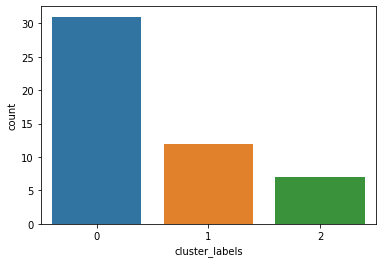

In [25]:
# Countplot of the clusters
sns.countplot(data.cluster_labels)

    Majority of data belong to Cluster 0

In [26]:
data.head()

,Murder,Assault,UrbanPop,Rape,cluster_labels
0,13.2,236,58,21.200,2
1,10.0,263,48,42.825,1
2,8.1,294,80,31.000,1
3,8.8,190,50,19.500,0
4,9.0,276,91,40.600,1


<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

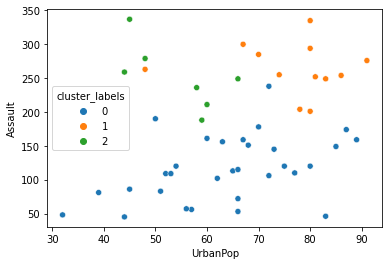

In [27]:
# ScatterPlot
sns.scatterplot(y = data.Assault, x = data.UrbanPop, hue=data.cluster_labels,palette = 'tab10', alpha=1)

In [28]:
data.iloc[:, 0:].groupby(data.cluster_labels).mean()

,Murder,Assault,UrbanPop,Rape,cluster_labels
cluster_labels,,,,,
0,5.003226,116.483871,63.838710,16.338710,0.0
1,10.966667,264.000000,76.500000,33.204167,1.0
2,14.671429,251.285714,54.285714,21.685714,2.0


Cluster 0 represents states with medium urban population having lowest assualt, murder and rape arrests.

Cluster 1 represents states having high assualt,murder and rape arrests and highest urban population.

Cluster 2 represents states with lowest urban population with high murder and medium Assault and rape arrests.